In [2]:
from src.data_loader import *
from src import random_seed

data = load_dataset()
Xval, Xtest, yval, ytest = validation_test_split(data)
print(f"Size of validation set, X: {Xval.shape}, y: {yval.shape}")
print(f"Size of test set, X: {Xtest.shape}, y: {ytest.shape}")

Size of validation set, X: (30, 10), y: (30,)
Size of test set, X: (20, 10), y: (20,)


In [3]:
best_blog_info = Xval.sort_values(["engagement_score"], ascending=False).head(1)
best_blog_index = best_blog_info.index[0]
best_blog_info = best_blog_info.reset_index(drop=True)
best_blog_info

,id,title_blog,url_blog,author_blog,author_followers,claps,comments,title_paper,url_paper,engagement_score
0,28,Towards Reasoning,https://medium.com/@saptarshichaudhuri/towards...,Saptarshi Chaudhuri,127,461,1,GSM-Symbolic: Understanding the Limitations of...,https://arxiv.org/pdf/2410.05229?source=post_p...,3.653543


In [4]:
worst_blog_info = Xval.sort_values(["engagement_score"], ascending=False).tail(1)
worst_blog_index = worst_blog_info.index[0]
worst_blog_info = worst_blog_info.reset_index(drop=True)
worst_blog_info

,id,title_blog,url_blog,author_blog,author_followers,claps,comments,title_paper,url_paper,engagement_score
0,18,SMoA: Improving Multi-agent Large Language Mod...,https://medium.com/@sulbha.jindal/smoa-improvi...,Sulbha Jain,41,0,0,SMoA: Improving Multi-agent Large Language Mod...,https://arxiv.org/pdf/2411.03284,0.0


In [5]:
blog = data.iloc[16]
blog

id                                                                            17
title_blog                     Self-Generated Critiques Boost Reward Modeling...
url_blog                       https://medium.com/@sulbha.jindal/self-generat...
author_blog                                                          Sulbha Jain
author_followers                                                              41
claps                                                                         21
comments                                                                       0
title_paper                    Self-Generated Critiques Boost Reward Modeling...
url_paper                                       https://arxiv.org/pdf/2411.16646
engagement_score                                                        0.512195
normalized_engagement_score                                                 49.0
Name: 16, dtype: object

In [6]:
from src.text_extraction import extract_blog_text

blog_text = extract_blog_text(blog)
print(blog_text)

# Self-Generated Critiques Boost Reward Modeling for LanguageModels — Paper Review
Paper — https://arxiv.org/pdf/2411.16646
Reinforcement Learning from Human Feedback (RLHF) has become a critical methodology for aligning large language models (LLMs) with human preferences. At the core of RLHF lies the reward model (RM), which is designed to evaluate model outputs by assigning scores that reflect their alignment with human judgments. These scores guide the optimization process during training, such as providing reward signals in Proximal Policy Optimization (PPO), thereby encouraging LLMs to generate responses that are more helpful, honest, and harmless. This iterative process enhances the practical quality of LLM outputs in real-world applications.

## Current challenge
Typically, reward models are trained using preference pairs and optimized through pairwise logistic loss to produce a scalar score for each response. However, this scalar output is often hard to interpret and underutili

In [7]:
from src.text_extraction import extract_paper_text

paper_url = data["url_paper"][16]
paper_text = extract_paper_text(paper_url)
print(paper_text)

Self-Generated Critiques Boost Reward Modeling
for Language Models
Yue Yu1,2,∗, Zhengxing Chen1, Aston Zhang1, Liang Tan1, Chenguang Zhu1, Richard Yuanzhe Pang1, Yundi
Qian1, Xuewei Wang1, Suchin Gururangan1, Chao Zhang2, Melanie Kambadur1, Dhruv Mahajan1, Rui Hou1
1GenAI, Meta, 2Georgia Institute of Technology
∗Work done during the internship at Meta GenAI.
Reward modeling is crucial for aligning large language models (LLMs) with human preferences,
especially in reinforcement learning from human feedback (RLHF). However, current reward models
mainly produce unexplainable scalar scores and struggle to incorporate critiques in a natural language
format. We hypothesize that generating both critiques and scalar rewards would improve reward
models’ capability on preference ranking. Motivated by this, we propose Critic-RM, a framework
that utilizes self-generated, high-quality critiques to train reward models for scalar reward-based
preference prediction, with explicit rationales serving as

In [10]:
from dotenv import load_dotenv
import os

load_dotenv()
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")

In [11]:
import google.generativeai as genai

genai.configure(api_key=GOOGLE_API_KEY)

available_models = [model.name for model in genai.list_models()]
print(f"Available models: {available_models}\n")
if "models/gemini-2.0-flash" in available_models:
    print("Gemini 2.0 Flash is available via API request!")
else:
    print("Gemini 2.0 Flash is not available via API request!")

Available models: ['models/chat-bison-001', 'models/text-bison-001', 'models/embedding-gecko-001', 'models/gemini-1.0-pro-vision-latest', 'models/gemini-pro-vision', 'models/gemini-1.5-pro-latest', 'models/gemini-1.5-pro-001', 'models/gemini-1.5-pro-002', 'models/gemini-1.5-pro', 'models/gemini-1.5-flash-latest', 'models/gemini-1.5-flash-001', 'models/gemini-1.5-flash-001-tuning', 'models/gemini-1.5-flash', 'models/gemini-1.5-flash-002', 'models/gemini-1.5-flash-8b', 'models/gemini-1.5-flash-8b-001', 'models/gemini-1.5-flash-8b-latest', 'models/gemini-1.5-flash-8b-exp-0827', 'models/gemini-1.5-flash-8b-exp-0924', 'models/gemini-2.0-flash-exp', 'models/gemini-2.0-flash', 'models/gemini-2.0-flash-001', 'models/gemini-2.0-flash-lite-001', 'models/gemini-2.0-flash-lite', 'models/gemini-2.0-flash-lite-preview-02-05', 'models/gemini-2.0-flash-lite-preview', 'models/gemini-2.0-pro-exp', 'models/gemini-2.0-pro-exp-02-05', 'models/gemini-exp-1206', 'models/gemini-2.0-flash-thinking-exp-01-21', 

In [12]:
# Check API request
gemini = genai.GenerativeModel("models/gemini-2.0-flash")
check_response = gemini.generate_content("If you receive this request, please say Hello.")
print(check_response.candidates[0].content.parts[0].text)

Hello.



In [13]:
# Checking if the model can get to the blog through the URL
check_response = gemini.generate_content(f"make a summary of this blog in 100 words\n\n{blog.url_blog}")
print(check_response)

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "Sulbha Jindal's blog post reviews a paper exploring a novel method to improve reward modeling for language models. Instead of relying solely on human preferences, the technique involves the language model generating its own critiques of its initial responses. These self-generated critiques are then used to refine the reward model, leading to better alignment with desired outputs. The paper demonstrates that this self-critique approach enhances the effectiveness of reinforcement learning from human feedback (RLHF), resulting in models that are more coherent, factually grounded, and aligned with human preferences.\n"
              }
            ],
            "role": "model"
          },
          "finish_reason": "STOP",
          "avg_logprobs": -0.438799493

In [14]:
# Passing clean text to the model
check_response = gemini.generate_content(f"make a summary of this blog in 100 words\n\n{blog_text}")
print(check_response)

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "Critic-RM, a new framework, enhances LLM reward modeling using self-generated critiques. Unlike traditional methods that output scalar scores, Critic-RM leverages LLMs to generate critiques alongside scores, filtered for consistency. Training balances critique modeling and reward prediction, improving evaluation accuracy. During inference, the model generates a critique then predicts a reward based on both the response and critique. Experiments show Critic-RM outperforms standard reward models by 3.7%-4.7%, emphasizing the importance of high-quality critiques, especially in reasoning tasks, leading to enhanced language model optimization and alignment with human preferences.\n"
              }
            ],
            "role": "model"
          },
         

In [15]:
# Checking ability to read PDF
check_response = gemini.generate_content(f"Create a table of contents for this publication.\n{paper_url}")
print(check_response)

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "Okay, here's a table of contents based on the provided arXiv paper:  \"On the Trade-off Between Regret and Constraint Violation in Constrained Markov Decision Processes\" (using the abstract and sections visible in the PDF):\n\n**Table of Contents**\n\n1.  **Introduction**\n    *   1.1 Motivation\n    *   1.2 Contributions\n    *   1.3 Related Works\n    *   1.4 Organization\n\n2.  **Problem Formulation**\n    *   2.1 Constrained Markov Decision Process (CMDP)\n    *   2.2 Performance Metrics: Regret and Constraint Violation\n    *   2.3 Assumptions\n\n3.  **Theoretical Analysis**\n    *   3.1 Lower Bound on Regret-Constraint Violation Trade-off\n    *   3.2 Upper Bound on Regret-Constraint Violation Trade-off\n\n4.  **Algorithm Design**\n    *   4.1 Algorit

In [16]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain_core.rate_limiters import InMemoryRateLimiter

rate_limiter = InMemoryRateLimiter(
    requests_per_second=0.25,  # One request per 4 seconds (RPM 15)
    max_bucket_size=1,         # Sequent requests
)
llm_gemini = ChatGoogleGenerativeAI(model="gemini-2.0-flash", temperature=1, rate_limiter=rate_limiter)

In [17]:
# One word answer
prompt_template_simple_answer = PromptTemplate(
    input_variables=["blog_text"],
    template="Rate this blog post in one word.\n\n{blog_text}"
)
chain = prompt_template_simple_answer | llm_gemini
response = chain.invoke({"blog_text": blog.url_blog})
print(f"Usage metadata:\n{response.usage_metadata}")
print(f"\nContent:\n{response.content}")

Usage metadata:
{'input_tokens': 56, 'output_tokens': 3, 'total_tokens': 59, 'input_token_details': {'cache_read': 0}}

Content:
Informative


In [18]:
# Adding numerical assessment
prompt_template_numeric_rating = PromptTemplate(
    input_variables=["blog_text"],
    template="Rate this blog post in one word and add a numerical rating.\n\n{blog_text}"
)
chain = prompt_template_numeric_rating | llm_gemini
response = chain.invoke({"blog_text": blog.url_blog})
print(f"Usage metadata:\n{response.usage_metadata}")
print(f"\nContent:\n{response.content}")

Usage metadata:
{'input_tokens': 61, 'output_tokens': 9, 'total_tokens': 70, 'input_token_details': {'cache_read': 0}}

Content:
Informative (8/10)


In [19]:
# Scale from 1 to 100 + short comment
prompt_short_comment = PromptTemplate(
    input_variables=["blog_text"],
    template="Rate this blog post on a scale from 1 to 100. Write a short comment to your assessment.\n\n{blog_text}"
)
chain = prompt_short_comment | llm_gemini
response = chain.invoke({"blog_text": blog.url_blog})
print(f"Usage metadata:\n{response.usage_metadata}")
print(f"\nContent:\n{response.content}")

Usage metadata:
{'input_tokens': 72, 'output_tokens': 139, 'total_tokens': 211, 'input_token_details': {'cache_read': 0}}

Content:
Okay, here's my assessment of the blog post:

**Rating: 82/100**

**Comment:** This is a well-written and insightful review of the "Self-Generated Critiques Boost Reward Modeling" paper. The author clearly understands the paper's core concepts and explains them in a way that is accessible to a relatively broad audience (assuming some familiarity with language models and reinforcement learning). The post effectively highlights the key contributions, strengths, and potential limitations of the research. It strikes a good balance between technical detail and clarity. The writing is engaging, and the structure is logical. A few more concrete examples might further enhance understanding for some readers.


In [20]:
# Emphasizing the importance of engagement
prompt_engagement_score = PromptTemplate(
    input_variables=["blog_text"],
    template="Analyze the engagement level of this blog. Rate it on a scale from 1 to 100. Write a short comment to your assessment.\n\n{blog_text}"
)
chain = prompt_engagement_score | llm_gemini
response = chain.invoke({"blog_text": blog.url_blog})
print(f"Usage metadata:\n{response.usage_metadata}")
print(f"\nContent:\n{response.content}")

Usage metadata:
{'input_tokens': 78, 'output_tokens': 360, 'total_tokens': 438, 'input_token_details': {'cache_read': 0}}

Content:
Okay, I need to analyze the engagement level of the Medium blog post you linked. To do this effectively, I would normally look for the following metrics directly on the page:

*   **Number of claps (likes/upvotes):**  A basic indicator of interest.
*   **Number of comments:** Shows active discussion and engagement.
*   **Number of shares:**  Indicates the content is considered valuable enough to share with others.
*   **Read ratio (views vs. reads):**  Indicates whether people are actually reading the whole piece after clicking.

Without being able to directly access that live data on the page, I'm going to have to make an *estimated* assessment based on what I can typically expect from a technical blog post on Medium, particularly one reviewing a research paper. Also, I am assuming the post is relatively recent (within the last few months). Older posts na

In [21]:
# Assessment based on several criteria
prompt_criteria = PromptTemplate(
    input_variables=["blog_text"],
    template="Analyze the engagement level of this blog based on factors such as readability, structure, attractiveness of the blog title, clarity, audience appeal, and potential for discussion. Rate it on a scale from 1 to 100. Write a short comment to your assessment.\n\n{blog_text}"
)
chain = prompt_engagement_score | llm_gemini
response = chain.invoke({"blog_text": blog.url_blog})
print(f"Usage metadata:\n{response.usage_metadata}")
print(f"\nContent:\n{response.content}")

Usage metadata:
{'input_tokens': 78, 'output_tokens': 280, 'total_tokens': 358, 'input_token_details': {'cache_read': 0}}

Content:
Okay, to analyze the engagement level of the Medium blog post, I'll look for indicators like:

*   **Claps/Likes:** A direct measure of appreciation.
*   **Comments:** Indicate active discussion and interest.
*   **Shares:** Show that people found the content valuable enough to distribute.
*   **Views/Reads:** While not directly engagement, they show the potential audience size.
*   **Highlighting:** Medium allows users to highlight portions of the text, showing specific interest.

After reviewing the blog post:

*   **Claps:** 47
*   **Comments:** 0
*   **Shares:** I cannot directly assess this from the page itself
*   **Highlighting:** Noticeable amount of highlighting in various sections of the article.
*   **Views:** I cannot directly assess this from the page itself

**Engagement Level Rating: 45/100**

**Comment:** The blog post has a low level of en

In [22]:
# Separate assessment
prompt_separate_assessment = PromptTemplate(
    input_variables=["blog_text"],
    template="Analyze the engagement level of this blog on a scale from 1 to 100 based on the following criteria:\n"
             " - Readability\n"
             " - Structure\n"
             " - Informativeness\n"
             " - Attractiveness of the blog title\n"
             " - Clarity\n"
             " - Audience appeal\n"
             " - Potential for discussion\n"
             "Provide separate score for each criterion. Then accumulate them into one overall assessment.\n"
             "\n"
             "Blog:\n"
             "{blog_text}\n"
)
chain = prompt_separate_assessment | llm_gemini
response = chain.invoke({"blog_text": blog.url_blog})
print(f"Usage metadata:\n{response.usage_metadata}")
print(f"\nContent:\n{response.content}")

Usage metadata:
{'input_tokens': 123, 'output_tokens': 706, 'total_tokens': 829, 'input_token_details': {'cache_read': 0}}

Content:
Okay, I've analyzed the blog post based on the criteria you provided. Here's my breakdown, scoring each element out of 100, and then providing an overall assessment:

**Criterion Breakdown:**

*   **Readability (75/100):** The writing style is generally clear and concise, avoiding overly complex jargon unless necessary. However, the technical nature of the subject matter (Reward Modeling for Language Models) inevitably raises the bar for general readability. Some readers might find the concepts difficult to grasp without prior knowledge of the field. Some longer paragraphs might benefit from being broken up for easier digestion.

*   **Structure (85/100):** The blog post follows a logical structure. It presents the problem, the solution proposed in the paper, and the methodology used. The use of headings and subheadings ("Introduction," "Methodology," "Re

In [23]:
# Add information about profile of the model
prompt_with_profile = PromptTemplate(
    input_variables=["blog_text"],
    template="You are an expert in evaluating written content, specializing in assessing how well blogs communicate scientific research to a broader audience.\n"
             "\n"
             "Task:\n"
             "Analyze the engagement level of the blog below, which references the provided scientific publication, on a scale from 1 to 100 based on the following criteria:\n"
             " - Readability\n"
             " - Structure\n"
             " - Informativeness\n"
             " - Attractiveness of the blog title\n"
             " - Clarity\n"
             " - Audience appeal\n"
             " - Potential for discussion\n"
             "\n"
             "Expected Output Format:\n"
             " - Provide separate score for each criterion with a short comment.\n"
             " - Then accumulate them into one overall assessment on a scale from 1 to 100.\n"
             " - Write down possible improvements to the blog.\n"
             " - Focus only on the textual content of the blog, disregarding any visual or interactive elements. This means that there is no need to add points related to the addition of illustrations or interactive elements to possible improvements.\n"
             "\n"
             "Now evaluate the provided blog:\n"
             "\n"
             "Referenced Blog to Evaluate:\n"
             "{blog_text}\n"
)
chain = prompt_with_profile | llm_gemini
response = chain.invoke({"blog_text": blog.url_blog})
print(f"Usage metadata:\n{response.usage_metadata}")
print(f"\nContent:\n{response.content}")

Usage metadata:
{'input_tokens': 244, 'output_tokens': 655, 'total_tokens': 899, 'input_token_details': {'cache_read': 0}}

Content:
Okay, I will analyze the provided blog post based on the specified criteria and format.

**Analysis of Blog Post: "Self-Generated Critiques Boost Reward Modeling for LanguageModels: Paper Review"**

Here's my evaluation:

*   **Readability (75/100):** The writing is generally clear, but assumes some familiarity with language models and reward modeling concepts. Some jargon is used without extensive explanation, which might make it challenging for readers without a technical background.
*   **Structure (80/100):** The blog post follows a logical structure, presenting the research question, methodology, results, and conclusion. The use of headings and subheadings helps to break up the text and guide the reader.
*   **Informativeness (70/100):** The blog post provides a good overview of the referenced paper. However, it could benefit from more context and ex

In [24]:
best_blog = {
    "blog": best_blog_info["url_blog"][0], # extract_blog_text(best_blog_info.iloc[0]),
    "paper" : extract_paper_text(best_blog_info["url_paper"][0]),
    "score" : yval.loc[best_blog_index]
}
worst_blog = {
    "blog" : worst_blog_info["url_blog"][0], # extract_blog_text(worst_blog_info.iloc[0]),
    "paper" : extract_paper_text(worst_blog_info["url_paper"][0]),
    "score" : yval.loc[worst_blog_index]
}

In [25]:
# Few-shot prompt
prompt_few_shots = PromptTemplate(
    input_variables=["blog_text",
                     "blog_ex1", "blog_ex2",
                     "score_ex1", "score_ex2"],
    template="You are an expert in evaluating written content, specializing in assessing how well blogs communicate scientific research to a broader audience.\n"
             "\n"
             "Task:\n"
             "Analyze the engagement level of the blog below, which references the provided scientific publication, on a scale from 1 to 100 based on the following criteria:\n"
             " - Readability\n"
             " - Structure\n"
             " - Informativeness\n"
             " - Attractiveness of the blog title\n"
             " - Clarity\n"
             " - Audience appeal\n"
             " - Potential for discussion\n"
             "\n"
             "Expected Output Format:\n"
             " - Provide separate score for each criterion with a short comment.\n"
             " - Then accumulate them into one overall assessment on a scale from 1 to 100.\n"
             " - Write down possible improvements to the blog.\n"
             " - Focus only on the textual content of the blog, disregarding any visual or interactive elements. This means that there is no need to add points related to the addition of illustrations or interactive elements to possible improvements.\n"
             "\n"
             "Reference Examples:\n"
             "These examples illustrate how blog engagement should be evaluated. They are for reference only and should not be evaluated in your response.\n"
             "\n"
             "---\n"
             "Example 1\n"
             "Blog:\n"
             "{blog_ex1}\n"
             "\n"
             "Engagement Score: {score_ex1}/100\n"
             "---\n"
             "\n"
             "Example 2\n"
             "Blog:\n"
             "{blog_ex2}\n"
             "\n"
             "Engagement Score: {score_ex2}/100\n"
             "---\n"
             "\n"
             "Now evaluate the provided blog:\n"
             "\n"
             "Referenced Blog to Evaluate:\n"
             "{blog_text}\n"
)
chain = prompt_few_shots | llm_gemini
response = chain.invoke({
    "blog_text" : blog.url_blog,
    "blog_ex1" : best_blog["blog"],
    "score_ex1" : best_blog["score"],
    "blog_ex2" : worst_blog["blog"],
    "score_ex2" : worst_blog["score"]
})
print(f"Usage metadata:\n{response.usage_metadata}")
print(f"\nContent:\n{response.content}")

Usage metadata:
{'input_tokens': 403, 'output_tokens': 578, 'total_tokens': 981, 'input_token_details': {'cache_read': 0}}

Content:
Here's an analysis of the provided blog post, focusing on its engagement level:

**Criterion Scores:**

*   **Readability:** 65/100 - The writing is generally understandable, but some sentences are a bit long and complex, potentially hindering flow for a general audience.
*   **Structure:** 70/100 - The blog follows a logical structure (introduction, methodology, results, conclusion). However, better use of headings and subheadings could improve scannability.
*   **Informativeness:** 75/100 - The blog provides a decent overview of the research paper, covering the key aspects of the study.
*   **Attractiveness of the blog title:** 60/100 - The title is descriptive but not particularly attention-grabbing. It clearly states the topic but lacks a hook to draw in casual readers.
*   **Clarity:** 60/100 - While the blog explains the core concepts, certain aspec

In [26]:
import re

def extract_llm_score(blog_info):
    """Extract model assessment of the blog from formated output"""
    try:
        llm_response = chain.invoke({"blog_text" : blog_info.url_blog,
                                     "blog_ex1" : best_blog["blog"],
                                     "score_ex1" : best_blog["score"],
                                     "blog_ex2" : worst_blog["blog"],
                                     "score_ex2" : worst_blog["score"]})
        content = llm_response.content

        # Pattern "Overall Assessment: {score}/100"
        match = re.search(r"Overall Assessment:\s*(\d+(\.\d*)?)\/100", content)
        if match:
            print(f"----------\n"
                  f"Blog ID: {blog_info.id}\n"
                  f"Blog title: {blog_info.title_blog}\n"
                  f"Referenced paper title: {blog_info.title_paper}\n"
                  f"LLM Assessment: {float(match.group(1))}/100\n")
            return float(match.group(1))
        else:
            print(f"----------\n"
                  f"Blog ID: {blog_info.id}: (Error) Bad output format.\n"
                  f"LLM Response:\n{content}\n")
            return None

    except Exception as e:
        print(f"Error processing blog - {blog_info.title_blog}:\n{e}")

In [27]:
# Concrete the output format
prompt_few_shots = PromptTemplate(
    input_variables=["blog_text",
                     "blog_ex1", "blog_ex2",
                     "score_ex1", "score_ex2"],
    template="You are an expert in evaluating written content, specializing in assessing how well blogs communicate scientific research to a broader audience.\n"
             "\n"
             "Task:\n"
             "Analyze the engagement level of the blog below, which references the provided scientific publication, on a scale from 1 to 100 based on the following criteria:\n"
             " - Readability\n"
             " - Structure\n"
             " - Informativeness\n"
             " - Attractiveness of the blog title\n"
             " - Clarity\n"
             " - Audience appeal\n"
             " - Potential for discussion\n"
             "\n"
             "Expected Output Format:\n"
             " - Provide separate score for each criterion with a short comment.\n"
             " - Then accumulate them into one overall assessment on a scale from 1 to 100. The overall assessment should be printed on a separate line in the following format:\n "
             "   Overall Assessment: X.X/100\n"
             " - Write down possible improvements to the blog.\n"
             " - Focus only on the textual content of the blog, disregarding any visual or interactive elements. This means that there is no need to add points related to the addition of illustrations or interactive elements to possible improvements.\n"
             "\n"
             "Reference Examples:\n"
             "These examples illustrate how blog engagement should be evaluated. They are for reference only and should not be evaluated in your response.\n"
             "\n"
             "---\n"
             "Example 1\n"
             "Blog:\n"
             "{blog_ex1}\n"
             "\n"
             "Engagement Score: {score_ex1}/100\n"
             "---\n"
             "\n"
             "Example 2\n"
             "Blog:\n"
             "{blog_ex2}\n"
             "\n"
             "Engagement Score: {score_ex2}/100\n"
             "---\n"
             "\n"
             "Now evaluate the provided blog:\n"
             "\n"
             "Referenced Blog to Evaluate:\n"
             "{blog_text}\n"
)
chain = prompt_few_shots | llm_gemini
llm_assessment = Xval.apply(extract_llm_score, axis=1)

----------
Blog ID: 35
Blog title: The Landscape of Emerging AI Agent Architectures for Reasoning, Planning, and Tool Calling: A Survey
Referenced paper title: The Landscape of Emerging AI Agent Architectures for Reasoning, Planning, and Tool Calling: A Survey
LLM Assessment: 77.9/100

----------
Blog ID: 21
Blog title: Reflections on Innateness in Machine Learning
Referenced paper title: Innateness, AlphaZero, and Artificial Intelligence
LLM Assessment: 73.0/100

----------
Blog ID: 31
Blog title: How reinforcement learning affects human behavior?
Referenced paper title: Acquisition of Chess Knowledge in AlphaZero
LLM Assessment: 68.6/100

----------
Blog ID: 20
Blog title: ChatGPT vs Bing … and the urgent need for Responsible AI
Referenced paper title: Adaptive Test Generation Using a Large Language Model
LLM Assessment: 64.0/100

----------
Blog ID: 48
Blog title: Data Centric AI — LLAVA
Referenced paper title: Visual Instruction Tuning
LLM Assessment: 62.9/100

----------
Blog ID: 

In [28]:
from sklearn import metrics

RMSE_val = metrics.root_mean_squared_error(yval, llm_assessment)
print(f"Root Mean Square Error on validation set: {RMSE_val:.1f}")
MAE_val = metrics.mean_absolute_error(yval, llm_assessment)
print(f"Mean Absolute Error on validation set: {MAE_val:.1f}")

Root Mean Square Error on validation set: 38.0
Mean Absolute Error on validation set: 31.8


In [40]:
from sklearn.preprocessing import MinMaxScaler

llm_assessment_scaler = MinMaxScaler(feature_range=(1, 100))
scaled_llm_assessment = llm_assessment_scaler.fit_transform(llm_assessment.values.reshape(-1, 1))
RMSE_val_scaled = metrics.root_mean_squared_error(yval, scaled_llm_assessment)
print(f"Root Mean Square Error on validation set after MinMax normalization of LLM output: {RMSE_val_scaled:.1f}")
MAE_val_scaled = metrics.mean_absolute_error(yval, scaled_llm_assessment)
print(f"Mean Absolute Error on validation set after MinMax normalization of LLM output: {MAE_val_scaled:.1f}")

Root Mean Square Error on validation set after MinMax normalization of LLM output: 47.0
Mean Absolute Error on validation set after MinMax normalization of LLM output: 40.0


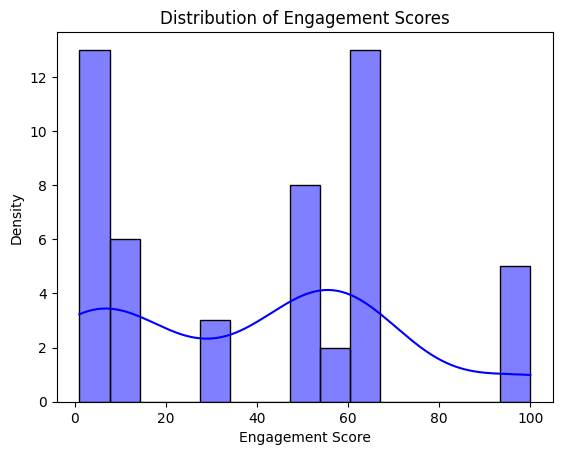

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data["normalized_engagement_score"], bins=15, kde=True, color="blue")
plt.xlabel("Engagement Score")
plt.ylabel("Density")
plt.title("Distribution of Engagement Scores")
plt.show()

In [227]:
def classify_blog(score):
    """Return blog classification based on engagement score."""
    if score >= 80:
        return "Excellent"
    elif score >= 60:
        return "Very Good"
    elif score >= 40:
        return "Good"
    elif score >= 20:
        return "Average"
    else:
        return "Bad"

data["engagement_level"] = data["normalized_engagement_score"].apply(classify_blog)
data

,id,title_blog,url_blog,author_blog,author_followers,claps,comments,title_paper,url_paper,engagement_score,normalized_engagement_score,engagement_level
0,1,Training Large Language Models: From TRPO to GRPO,https://medium.com/data-science-collective/training-large-language-models-from-trpo-to-grpo-f3607a126194,Maxime Wolf,349,177,1,Foundations of Large Language Models,https://arxiv.org/pdf/2501.09223,0.515759,50.0,Good
1,2,Training Large Language Models: From TRPO to GRPO,https://medium.com/data-science-collective/training-large-language-models-from-trpo-to-grpo-f3607a126194,Maxime Wolf,349,177,1,DeepSeek-R1: Incentivizing Reasoning Capability in LLMs via Reinforcement Learning,https://arxiv.org/pdf/2501.12948,0.515759,50.0,Good
2,3,Training Large Language Models: From TRPO to GRPO,https://medium.com/data-science-collective/training-large-language-models-from-trpo-to-grpo-f3607a126194,Maxime Wolf,349,177,1,DeepSeekMath: Pushing the Limits of Mathematical Reasoning in Open Language Models,https://arxiv.org/pdf/2402.03300,0.515759,50.0,Good
3,4,Training Large Language Models: From TRPO to GRPO,https://medium.com/data-science-collective/training-large-language-models-from-trpo-to-grpo-f3607a126194,Maxime Wolf,349,177,1,Trust Region Policy Optimization,https://arxiv.org/pdf/1502.05477,0.515759,50.0,Good
4,5,What is the System 2 LLM or AI Chatbot?,https://medium.com/@don-lim/what-is-the-system-2-model-28d35deff287,Don Lim,413,17,0,Guiding Language Model Reasoning with Planning Tokens,https://arxiv.org/pdf/2310.05707,0.041162,4.0,Bad
5,6,What is the System 2 LLM or AI Chatbot?,https://medium.com/@don-lim/what-is-the-system-2-model-28d35deff287,Don Lim,413,17,0,Distilling System 2 into System 1,https://arxiv.org/pdf/2407.06023,0.041162,4.0,Bad
6,7,What is the System 2 LLM or AI Chatbot?,https://medium.com/@don-lim/what-is-the-system-2-model-28d35deff287,Don Lim,413,17,0,Chain-of-Thought Prompting Elicits Reasoning in Large Language Models,https://arxiv.org/pdf/2201.11903,0.041162,4.0,Bad
7,8,What is the System 2 LLM or AI Chatbot?,https://medium.com/@don-lim/what-is-the-system-2-model-28d35deff287,Don Lim,413,17,0,Tree of Thoughts: Deliberate Problem Solving with Large Language Models,https://arxiv.org/pdf/2305.10601,0.041162,4.0,Bad
8,9,What is the System 2 LLM or AI Chatbot?,https://medium.com/@don-lim/what-is-the-system-2-model-28d35deff287,Don Lim,413,17,0,Branch-Solve-Merge Improves Large Language Model Evaluation and Generation,https://arxiv.org/pdf/2310.15123,0.041162,4.0,Bad
9,10,What is the System 2 LLM or AI Chatbot?,https://medium.com/@don-lim/what-is-the-system-2-model-28d35deff287,Don Lim,413,17,0,System 2 Attention (is something you might need too),https://arxiv.org/pdf/2311.11829,0.041162,4.0,Bad


In [228]:
# Split the training dataset into 60% train and 40% test
Xval, Xtest, yval, ytest = train_test_split(data.drop(columns=['engagement_level']), data["engagement_level"], test_size=0.4, random_state=random_seed)

In [229]:
from langchain_core.pydantic_v1 import BaseModel, Field
from typing import List, Literal

"""
class CriterionEvaluation(BaseModel):
    \"""Rating a blog based on one criterion\"""
    criterion: str = Field(..., description="Name of the criterion")
    classification: Literal["Excellent", "Very Good", "Good", "Average", "Bad"] = Field(..., description="Categorical classification of the blog based on the given criterion")
    comment: str = Field(..., description="Short comment on the blog's assessment based on a given criterion")
"""

class BlogEvaluation(BaseModel):
    """Comprehensive blog assessment"""
    blog_title: str = Field(..., description="Blog title")
    # separate_assessment: List[CriterionEvaluation] = Field(..., description="List of assessment for each criterion")
    overall_assessment: Literal["Excellent", "Very Good", "Good", "Average", "Bad"] = Field(..., description="Overall assessment of the blog")
    assessment_explanation: str = Field(..., description="Explanation of the assessment")
    improvements: List[str] = Field(..., description="Suggested improvements for the blog")

def print_evaluation(blog_evaluation: BlogEvaluation):
    print(f"Blog Title: {blog_evaluation.blog_title}")
    print(f"Overall Assessment: {blog_evaluation.overall_assessment}")
    print(f"Explanation: {blog_evaluation.assessment_explanation}")
    print("Suggested Improvements:")
    for i, improvement in enumerate(blog_evaluation.improvements, start=1):
        print(f"\t{i}. {improvement}")

llm_gemini = ChatGoogleGenerativeAI(model="gemini-2.0-flash", temperature=1, rate_limiter=rate_limiter).with_structured_output(BlogEvaluation)

In [242]:
yval

34    Very Good
20      Average
30    Excellent
19    Very Good
47         Good
17          Bad
29    Excellent
7           Bad
18          Bad
6           Bad
26         Good
4           Bad
23          Bad
21      Average
35    Very Good
11          Bad
2          Good
5           Bad
39    Very Good
45    Very Good
16         Good
25         Good
31    Excellent
27    Excellent
46         Good
8           Bad
33          Bad
37    Very Good
28    Excellent
0          Good
Name: engagement_level, dtype: object

In [256]:
excellent_blog_index = yval[yval == "Excellent"].index.min()
excellent_blog = extract_blog_text(Xval.loc[excellent_blog_index])
very_good_blog_index = yval[yval == "Very Good"].index.min()
very_good_blog = extract_blog_text(Xval.loc[very_good_blog_index])
good_blog_index = yval[yval == "Good"].index.min()
good_blog = extract_blog_text(Xval.loc[good_blog_index])
average_blog_index = yval[yval == "Average"].index.min()
average_blog = extract_blog_text(Xval.loc[average_blog_index])
bad_blog_index = yval[yval == "Bad"].index.min()
bad_blog = extract_blog_text(Xval.loc[bad_blog_index])

In [260]:
prompt = PromptTemplate(
    input_variables=["blog_text", "excellent_blog", "very_good_blog", "good_blog", "average_blog", "bad_blog"],
    template="You are a very strict expert in evaluating written content, specializing in assessing how well blogs communicate scientific research to a broader audience.\n"
             "\n"
             "Task:\n"
             "Analyze the engagement level of the blog below based on the following criteria:\n"
             " - Readability\n"
             " - Structure\n"
             " - Informativeness\n"
             " - Attractiveness of the blog title\n"
             " - Clarity\n"
             " - Audience appeal\n"
             " - Potential for discussion\n"
             "\n"
             "Expected Output Format:\n"
             " - Summarize the overall engagement level using one of the following ratings: \"Excellent\", \"Very Good\", \"Good\", \"Average\", \"Bad\".\n"
             " - Explain why you gave this assessment.\n"
             " - Write down possible improvements to the blog.\n"
             " - Focus only on the textual content of the blog, disregarding any visual or interactive elements. This means that there is no need to add points related to the addition of illustrations or interactive elements to possible improvements.\n"
             " - Сalmly lower your blog assessment according to the number of bugs.\n"
             " - Return ONLY a valid JSON object in plain text.\n"
             "\n"
             "Reference Examples:\n"
             "Below are examples of blog evaluations, each representing a different engagement level. Use them as a reference when assessing the provided blog.\n"
             "\n"
             "---\n"
             "Example 1 (Excellent)\n"
             "Blog:\n"
             "{excellent_blog}\n"
             "\n"
             "Engagement level: Excellent\n"
             "---\n"
             "\n"
             "Example 2 (Very Good)\n"
             "Blog:\n"
             "{very_good_blog}\n"
             "\n"
             "Engagement level: Very Good\n"
             "---\n"
             "\n"
             "Example 3 (Good)\n"
             "Blog:\n"
             "{good_blog}\n"
             "\n"
             "Engagement level: Good\n"
             "---\n"
             "\n"
             "Example 4 (Average)\n"
             "Blog:\n"
             "{average_blog}\n"
             "\n"
             "Engagement level: Average\n"
             "---\n"
             "\n"
             "Example 5 (Bad)\n"
             "Blog:\n"
             "{bad_blog}\n"
             "\n"
             "Engagement level: Bad\n"
             "---\n"
             "\n"
             "Now evaluate the provided blog:\n"
             "\n"
             "Referenced Blog to Evaluate:\n"
             "{blog_text}\n"
)
chain = prompt | llm_gemini
response = chain.invoke({
    "blog_text" : extract_blog_text(blog),
    "excellent_blog" : excellent_blog,
    "very_good_blog" : very_good_blog,
    "good_blog" : good_blog,
    "average_blog" : average_blog,
    "bad_blog" : bad_blog
})
print_evaluation(response)

Blog Title: Self-Generated Critiques Boost Reward Modeling for LanguageModels — Paper Review
Overall Assessment: Good
Explanation: The blog post provides a concise overview of the Critic-RM framework for enhancing reward modeling in LLMs. It effectively summarizes the paper's key contributions, including the methodology, results, and overall impact. The blog is well-structured, with clear sections and subheadings that guide the reader through the topic. However, it could benefit from a slightly more engaging title and a more detailed explanation of certain technical aspects to enhance readability and appeal to a broader audience.
Suggested Improvements:
	1. Enhance the title to be more captivating and indicative of the content.
	2. Provide more detailed explanations of technical concepts, possibly with examples, to improve readability for readers with varying levels of expertise.
	3. Consider adding a section discussing the limitations of the Critic-RM framework and potential areas for

In [265]:
def extract_llm_classification(blog_info, max_retries=3):
    """Extract model assessment of the blog from formated output"""
    for attempt in range(max_retries):
        try:
            llm_response = chain.invoke({
                "blog_text" : extract_blog_text(blog_info),
                "excellent_blog" : excellent_blog,
                "very_good_blog" : very_good_blog,
                "good_blog" : good_blog,
                "average_blog" : average_blog,
                "bad_blog" : bad_blog
            })

            if llm_response:
                print(f"----------\n"
                    f"Blog ID: {blog_info.id}\n"
                    f"Blog title: {blog_info.title_blog}\n"
                    f"Referenced paper title: {blog_info.title_paper}\n"
                    f"LLM Assessment: {llm_response.overall_assessment}\n")
                return llm_response.overall_assessment
            else:
                print(f"Warning: Received invalid response on attempt {attempt + 1}.\n Retrying...")

        except Exception as e:
            print(f"Error processing blog \"{blog_info.title_blog}\":\n{e}\n Retrying...")

    print(f"Failed to get valid assessment after {max_retries} attempts.")
    return None

In [266]:
llm_classification = Xval.apply(extract_llm_classification, axis=1)

----------
Blog ID: 35
Blog title: The Landscape of Emerging AI Agent Architectures for Reasoning, Planning, and Tool Calling: A Survey
Referenced paper title: The Landscape of Emerging AI Agent Architectures for Reasoning, Planning, and Tool Calling: A Survey
LLM Assessment: Good

----------
Blog ID: 21
Blog title: Reflections on Innateness in Machine Learning
Referenced paper title: Innateness, AlphaZero, and Artificial Intelligence
LLM Assessment: Average

----------
Blog ID: 31
Blog title: How reinforcement learning affects human behavior?
Referenced paper title: Acquisition of Chess Knowledge in AlphaZero
LLM Assessment: Average

----------
Blog ID: 20
Blog title: ChatGPT vs Bing … and the urgent need for Responsible AI
Referenced paper title: Adaptive Test Generation Using a Large Language Model
LLM Assessment: Very Good

----------
Blog ID: 48
Blog title: Data Centric AI — LLAVA
Referenced paper title: Visual Instruction Tuning
LLM Assessment: Average

----------
Blog ID: 18
Blo

In [268]:
prediction_accuracy = metrics.accuracy_score(yval, llm_classification)
print(f"Accuracy score on validation set: {prediction_accuracy * 100:.2f}%")

Accuracy score on validation set: 50.00%


In [270]:
level_map = {
    "Excellent" : 5,
    "Very Good" : 4,
    "Good" : 3,
    "Average" : 2,
    "Bad" : 1
}
RMSE_val_verbal = metrics.root_mean_squared_error(yval.map(level_map), llm_classification.map(level_map))
MAE_val_verbal = metrics.mean_absolute_error(yval.map(level_map), llm_classification.map(level_map))
print(f"Root Mean Square Error on validation set after using the verbal classification: {RMSE_val_verbal:.1f}")
print(f"Mean Absolute Error on validation set after using verbal classification: {MAE_val_verbal:.1f}")

Root Mean Square Error on validation set after using the verbal classification: 1.2
Mean Absolute Error on validation set after using verbal classification: 0.8
